# Практическое задание 4

Выполнил - Назарова Алёна Алексеевна

Этапы выполнения: 

1. Загрузить текст на русском языке из файла (файл test.txt, объем файла ~ 200 Кб) текст выбрать самостоятельно
2. Удалить стоп-слова и знаки препинания
3. Выполнить токенизацию, подсчёт слов и анализ документа DataFrame (Слово|Количество|Ранг|Процент)
4. Построить гистограмму, treepmap, облако слов   

Опубликовать файл расширения ipynb на платформу Odin.

In [1]:
import re
import string

tokens = []
hist = {}
fp = open('Рассвет.txt', 'r', encoding='utf-8')
strippables = string.punctuation + string.whitespace

for line in fp:
    line = line.lower()
    line = re.sub(r'[^а-яА-Я ^0-9]', '', str(line))    
    for word in line.split():
        word = word.strip(strippables)
        hist[word] = hist.get(word, 0) + 1
        tokens.append(word)
hist
#tokens[:100]

{'рассвет': 2,
 'стефани': 2,
 'майер': 2,
 'сумеречная': 1,
 'сага': 1,
 '4сумерки': 1,
 'настоящая': 2,
 'любовь': 6,
 'не': 1010,
 'знает': 10,
 'страха': 4,
 'белла': 113,
 'свон': 5,
 'сделала': 9,
 'свой': 10,
 'выбор': 5,
 'променяла': 1,
 'жизнь': 23,
 'на': 581,
 'счастье': 8,
 'и': 1008,
 'вместе': 15,
 'с': 361,
 'обручальным': 1,
 'кольцом': 3,
 'эдварда': 95,
 'приняла': 3,
 'дар': 2,
 'проклятие': 1,
 'вампирского': 1,
 'бессмертия': 2,
 'но': 165,
 'блаженство': 1,
 'медового': 3,
 'месяца': 3,
 'превращается': 1,
 'в': 806,
 'ужас': 2,
 'когда': 119,
 'выясняется': 1,
 'что': 476,
 'молодожены': 1,
 'скоро': 13,
 'станут': 2,
 'родителями': 1,
 'нарушен': 3,
 'один': 23,
 'из': 100,
 'главных': 1,
 'основополагающих': 1,
 'вампирских': 1,
 'законов': 1,
 'белле': 13,
 'эдварду': 22,
 'их': 44,
 'ребенку': 1,
 'грозит': 2,
 'наказание': 2,
 'гибель': 2,
 'однако': 25,
 'неожиданно': 9,
 'они': 58,
 'обретают': 1,
 'сильного': 1,
 'надежного': 1,
 'союзника': 1,
 'лице': 

In [2]:
!pip install collection

In [3]:
from collections import Counter

def word_counter(tokens):
    word_counts = Counter()
    word_counts.update(tokens)
    return word_counts
  
word_count = word_counter(tokens)
word_count.most_common(10)

[('я', 1195),
 ('не', 1010),
 ('и', 1008),
 ('в', 806),
 ('на', 581),
 ('что', 476),
 ('с', 361),
 ('он', 355),
 ('как', 323),
 ('меня', 321)]

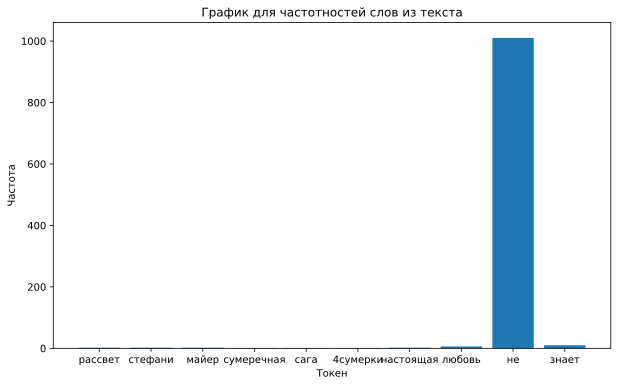

In [4]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
plt.rc('figure', figsize=(10, 6))

x = list(word_count.keys())[:10]
y = list(word_count.values())[:10]

plt.bar(x, y)
plt.title('График для частотностей слов из текста')
plt.xlabel('Токен')
plt.ylabel('Частота')
plt.show()

In [5]:
import pandas as pd

def count(docs):
  
    word_counts = Counter()
    appears_in = Counter()
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = list(zip(word_counts.keys(), word_counts.values()))
    
    # Колонки слов и количества
    wc = pd.DataFrame(temp, columns = ['word', 'count'])
    
    # Колонка ранга
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    
    # Колонка с общим процентом
    total = wc['count'].sum()
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    # Колонка с кумулятивным общим процентом
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    # Появляется в колонке
    t2 = list(zip(appears_in.keys(), appears_in.values()))
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    # Появляется в колонке процентов
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    
    return wc.sort_values(by='rank')
  
wc = count([tokens])

wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
9974,я,1,1195,1.0,0.034437,0.034437,1.0
1777,не,1,1010,2.0,0.029106,0.063543,1.0
2915,и,1,1008,3.0,0.029048,0.092591,1.0
6182,в,1,806,4.0,0.023227,0.115818,1.0
5835,на,1,581,5.0,0.016743,0.132561,1.0


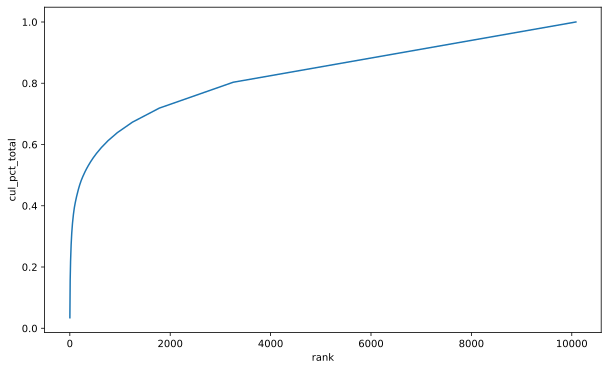

In [6]:
import seaborn as sns

sns.lineplot(x = 'rank', y = 'cul_pct_total', data = wc)
plt.show();

In [7]:
!pip install squarify

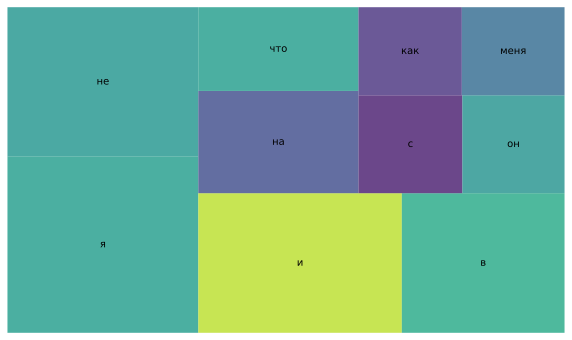

In [8]:
import squarify

wc_top20 = wc[wc['rank'] <= 10]
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show();

In [9]:
!pip install spacy 
!pip install https://github.com/explosion/spacy-models/releases/download/ru_core_news_sm-3.1.0/ru_core_news_sm-3.1.0.tar.gz
!python -m spacy download en_core_web_lg
!python -m spacy download ru_core_news_sm

     |████████████████████████████████| 15.9 MB 571 kB/s eta 0:00:01


     |████████████████████████████████| 777.1 MB 37 kB/s  eta 0:00:011     |██████████████████▉             | 458.2 MB 544 kB/s eta 0:09:46     |████████████████████            | 486.6 MB 534 kB/s eta 0:09:04     |████████████████████████████▊   | 696.2 MB 563 kB/s eta 0:02:24     |█████████████████████████████▏  | 707.0 MB 323 kB/s eta 0:03:37
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
     |████████████████████████████████| 16.1 MB 3.6 MB/s eta 0:00:01


✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')


In [13]:
sample_text = "Детство – это не с рождения до зрелости. Вырастет ребенок и оставит детские забавы. Детство – это королевство, где никто не умирает."

In [14]:
import spacy 

nlp = spacy.load("ru_core_news_sm")

def spacy_tokenize(text):
    doc = nlp.tokenizer(text)
    return [token.text for token in doc]

spacy_tokens = spacy_tokenize(sample_text)

spacy_tokens[:10]

['Детство',
 '–',
 'это',
 'не',
 'с',
 'рождения',
 'до',
 'зрелости',
 '.',
 'Вырастет']

In [15]:
spacy_stopwords = spacy.lang.ru.stop_words.STOP_WORDS

def remove_stopwords(tokens):
    cleaned_tokens = []  
    punct = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–' 
     
    for token in tokens:
        if (token not in spacy_stopwords) & (token not in punct):
            cleaned_tokens.append(token)
    
    return cleaned_tokens


cleaned_tokens = remove_stopwords(spacy_tokens)

cleaned_tokens[:10]

['Детство',
 'рождения',
 'зрелости',
 'Вырастет',
 'ребенок',
 'оставит',
 'детские',
 'забавы',
 'Детство',
 'королевство']

In [16]:
wc = count([cleaned_tokens])

wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
5,Детство,1,2,1.0,0.153846,0.153846,1.0
1,рождения,1,1,2.0,0.076923,0.230769,1.0
0,зрелости,1,1,3.0,0.076923,0.307692,1.0
2,Вырастет,1,1,4.0,0.076923,0.384615,1.0
4,ребенок,1,1,5.0,0.076923,0.461538,1.0


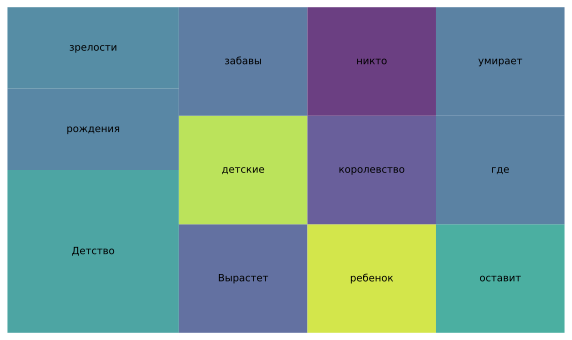

In [17]:
wc_top20 = wc[wc['rank'] <= 15]
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show();

In [18]:
!pip install wordcloud


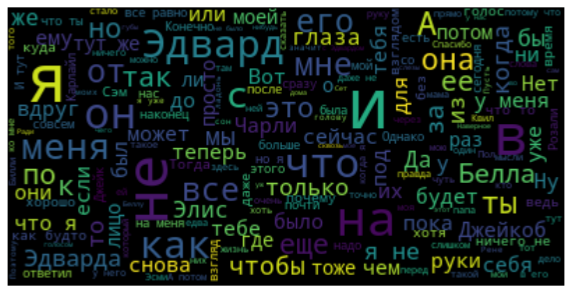

In [19]:
from wordcloud import WordCloud

text = open('Рассвет.txt', 'r', encoding='utf-8').read()

wordcloud = WordCloud(max_font_size=50).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()